In [1]:
"""

TO-DO : Create a model based on Naive Bayes. Train the model and optimize it over dev. Final testing done on test dataset.
    Importing  vectorization for the vectorized values
    Check with both TFIDF and Hash vectorization
    This shall contain multinomial NB. Please read "Readme" for other algorithms.
    
    Summary of the model : Accuracy is with respect to "dev"
        ------------------------------
        Model Name: clb/clb_lap
        Algorithm : Naive Bayers - TFIDF MultinomialNB
        Time to train : 0.067
        Accuracy : 0.76
        Accuracy with smoothing:0.77293
        -------------------------------
        
        ------------------------------
        Model Name: clf/clf_lap
        Algorithm : Naive Bayers - Hash MultinomialNB
        Time to train : 0.112
        Accuracy : 0.77
        Accuracy with smoothing:0.75453
        -------------------------------

Rahul's Intuition : The relatively low training accuracy of these models can suggest high bias i.e underfitting.
                    Not sure how to fix that.
            
"""

'\n\nTO-DO : Create a model based on Naive Bayes. Train the model and optimize it over dev. Final testing done on test dataset.\n    Importing  vectorization for the vectorized values\n    Check with both TFIDF and Hash vectorization\n    Output with both Normalized and dis-normalized? Un-normalized? non-normalized? :/\n    This shall contain multinomial NB. Please read "Readme" for other algorithms.\n    \n    Summary of the model : Accuracy is with respect to "dev"\n        ------------------------------\n        Model Name: clb/clb_lap\n        Algorithm : Naive Bayers - TFIDF MultinomialNB\n        Time to train : 0.067\n        Accuracy : 0.76\n        Accuracy with smoothing:0.77293\n        -------------------------------\n        \n        ------------------------------\n        Model Name: clf/clf_lap\n        Algorithm : Naive Bayers - Hash MultinomialNB\n        Time to train : 0.112\n        Accuracy : 0.77\n        Accuracy with smoothing:0.75453\n        -----------------

In [2]:
import pandas as pd
import import_ipynb
import Vectorization as v
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot as plt



importing Jupyter notebook from Vectorization.ipynb
importing Jupyter notebook from Dataset_Preprocessing_2.ipynb
Megaset size 70628
Columns :  Index(['Rating', 'Statement'], dtype='object')
Number of true statements :  18814
Number of false statements :  16500
(35314,)
(35314,)
31782
3532
28250
3532
<class 'pandas.core.series.Series'>
Final size of train/dev/test :  28250 / 3532 / 3532
28250
(28250,)
<class 'pandas.core.series.Series'>
(28250,)


In [3]:
#Storing tfidf variables for the model

tfidf_mega_train_x = v.tfidf_mega_train_x
tfidf_mega_dev_x = v.tfidf_mega_dev_x
tfidf_mega_test_x = v.tfidf_mega_test_x

#tfidf_mega_train_y= v.tfidf_mega_train_y
#tfidf_mega_dev_y= v.tfidf_mega_dev_y
#tfidf_mega_test_y= v.tfidf_mega_test_y

mega_train_y=v.mega_train_y
mega_dev_y=v.mega_dev_y


In [4]:
#print(tfidf_mega_train_x.shape)
#print(tfidf_mega_train_y.shape)

Time Taken to fit and classify : 0.0677952766418457
accuracy: 0.7675537938844847
Confusion matrix, without normalization
[[1104  549]
 [ 272 1607]]


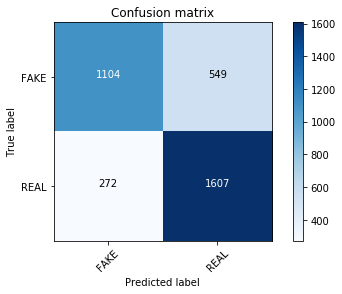

In [5]:
#--------------------------------------------------------------
# Naive Bayes classifier for Multinomial model using tfidf
#--------------------------------------------------------------
clb = MultinomialNB() 

start = time.time()

clb.fit(tfidf_mega_train_x, mega_train_y)                       # Fit Naive Bayes classifier 
pred_dev_nb = clb.predict(tfidf_mega_dev_x)                     # Perform classification 

end = time.time()

print("Time Taken to fit and classify :",(end - start))

score = metrics.accuracy_score(mega_dev_y, pred_dev_nb)
print("accuracy:" ,score)

cm = metrics.confusion_matrix(mega_dev_y, pred_dev_nb)
v.plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


#FIRST MODEL FINALLY BUILT WITH ABYSMAL ACCURACY :(


accuracy: 0.8066902654867256
Confusion matrix, without normalization
[[ 9633  3547]
 [ 1914 13156]]


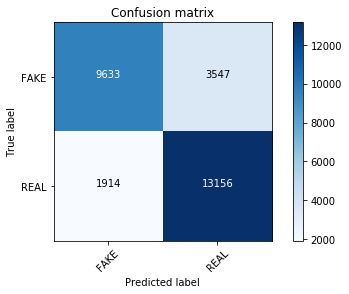

In [6]:
#TRAINING ON TRAIN DATA FOR bias and variance

pred_train_nb = clb.predict(tfidf_mega_train_x)                     # Perform classification 

score = metrics.accuracy_score(mega_train_y, pred_train_nb)
print("accuracy:" ,score)

cm = metrics.confusion_matrix(mega_train_y, pred_train_nb)
v.plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)
#0.80 accuracy on training is ........ less?

In [7]:
#---------------------------------------------------------------------------------------------------------------
# Naive Bayes classifier for Multinomial model using tfidf with Additive (Laplace/Lidstone) smoothing parameter
#---------------------------------------------------------------------------------------------------------------
import numpy as np

clb_lap = MultinomialNB(alpha=0.1) 
last_score = 0

for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_mega_train_x, mega_train_y)
    pred_dev_nbs = nb_classifier.predict(tfidf_mega_dev_x)
    score = metrics.accuracy_score(mega_dev_y, pred_dev_nbs)
    if score > last_score:
        clb_lap = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))
    
#Best accuracy is at alpha=0.30! 

Alpha: 0.00 Score: 0.73641


C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.10 Score: 0.77237
Alpha: 0.20 Score: 0.76982
Alpha: 0.30 Score: 0.77293
Alpha: 0.40 Score: 0.77152
Alpha: 0.50 Score: 0.76982
Alpha: 0.60 Score: 0.76982
Alpha: 0.70 Score: 0.76982
Alpha: 0.80 Score: 0.77095
Alpha: 0.90 Score: 0.76925


In [8]:
#Creating a Naive Bayes model with hashed dataset instead of Tdidf

#Storing variables from hash fuction

hash_mega_train_x = v.hash_mega_train_x 
hash_mega_test_x = v.hash_mega_test_x
hash_mega_dev_x = v.hash_mega_dev_x 


Time Taken to fit and classify : 0.1156919002532959
accuracy: 0.7729331823329558
Confusion matrix, without normalization
[[1220  433]
 [ 369 1510]]


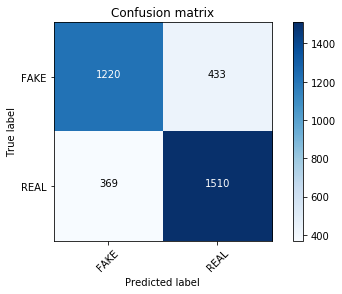

In [9]:
#--------------------------------------------------------------
# Naive Bayes classifier for Multinomial model using hash
#--------------------------------------------------------------

clf = MultinomialNB(alpha=0.01) 

start = time.time()

clf.fit(hash_mega_train_x, mega_train_y)                       # Fit Naive Bayes classifier 
pred_dev_hash = clf.predict(hash_mega_dev_x)                     # Perform classification 

end = time.time()

print("Time Taken to fit and classify :",(end - start))

score = metrics.accuracy_score(mega_dev_y, pred_dev_hash)
print("accuracy:" ,score)

cm = metrics.confusion_matrix(mega_dev_y, pred_dev_hash)
v.plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

# WOW!! A MASSIVE INCREASE IN ACCURACY COMPARED TO TFIDF. A "step" in the right direction. 

accuracy: 0.8235398230088495
Confusion matrix, without normalization
[[10720  2460]
 [ 2525 12545]]


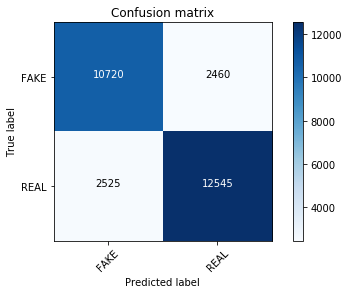

In [10]:
#Checking accuracy w.r.t to training data
pred_train_hash = clf.predict(hash_mega_train_x)                     # Perform classification 

score = metrics.accuracy_score(mega_train_y, pred_train_hash)
print("accuracy:" ,score)

cm = metrics.confusion_matrix(mega_train_y, pred_train_hash)
v.plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

#Both accuracies i.e hash and tfidf have train and dev nearby. No high bias/variance

In [11]:
#---------------------------------------------------------------------------------------------------------------
# Naive Bayes classifier for Multinomial model using hash with Additive (Laplace/Lidstone) smoothing parameter
#---------------------------------------------------------------------------------------------------------------

clf_lap = MultinomialNB(alpha=0.1) 
last_score = 0

for alpha in np.arange(0,1.1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(hash_mega_train_x, mega_train_y)
    pred_dev_hls = nb_classifier.predict(hash_mega_dev_x)
    score = metrics.accuracy_score(mega_dev_y, pred_dev_hls)
    if score > last_score:
        clf_lap = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))
    

#Smoothing on hash has a worsening effect on the hash fucntions. Why?
#Also alpha at 0.01 provdies higher accuracy as seen in prev model
#but same accuracy is not consistent when put it loop here. why?????????
#Need to check if proper variables are used.  

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.75453
Alpha: 0.10 Score: 0.75170
Alpha: 0.20 Score: 0.73952
Alpha: 0.30 Score: 0.73358
Alpha: 0.40 Score: 0.73358
Alpha: 0.50 Score: 0.73046
Alpha: 0.60 Score: 0.72650
Alpha: 0.70 Score: 0.72424
Alpha: 0.80 Score: 0.72169
Alpha: 0.90 Score: 0.72140
Alpha: 1.00 Score: 0.71942
